# **Productivity and Internet Data Trends in the USA.**

---
# **Internet Data Processing**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/DSA 210 Project Files/Productivity and Internet/internet data.xlsx'
df_internet = pd.read_excel(file_path, skiprows=4)
df_internet = df_internet.dropna(axis=1, how='all')

df_internet_melted = df_internet.melt(
    id_vars=['Country Name'],
    value_vars=[col for col in df_internet.columns if isinstance(col, int)],
    var_name='Year',
    value_name='Internet Users (%)'
)

# Convert Year to int
df_internet_melted['Year'] = df_internet_melted['Year'].astype(int)
df_internet_melted = df_internet_melted.drop(columns='Country Name')

df_internet_melted

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Year,Internet Users (%)
0,1990,0.784729
1,1991,1.163194
2,1992,1.724203
3,1993,2.271673
4,1994,4.862781
5,1995,9.237088
6,1996,16.419353
7,1997,21.616401
8,1998,30.093197
9,1999,35.848724


---
# **Productivity Data Processing (Labour Productivity and Total Factor Productivity)**

In [8]:
file_path = '/content/drive/MyDrive/DSA 210 Project Files/Productivity and Internet/total-factor-productivity-major-sectors-historical.xlsx'
df = pd.read_excel(file_path, skiprows=2)

# Filter for Total Factor Productivity in the Private nonfarm business sector
tfp_df = df[
    (df['Sector'] == 'Private business sector') &
    (df['Measure'] == 'Total factor productivity')
]
lp_df = df[
    (df['Sector'] == 'Private business sector') &
    (df['Measure'] == 'Labor productivity')
]

lp_df = lp_df.drop(columns=['NAICS', 'Sector', 'Measure', 'Units'])

lp_df = lp_df.T
lp_df = lp_df.drop(lp_df.columns[1], axis = 1)
lp_df = lp_df.reset_index()
lp_df = lp_df.rename(columns={'index': 'Year'})
lp_df = lp_df.rename(columns={lp_df.columns[1]: 'Labour_Productivity_Index'})

# Drop metadata columns to leave only year values
tfp_df = tfp_df.drop(columns=['NAICS', 'Sector', 'Measure', 'Units'])

tfp_df = tfp_df.T
tfp_df = tfp_df.drop(tfp_df.columns[1], axis = 1)
tfp_df = tfp_df.reset_index()
tfp_df = tfp_df.rename(columns={'index': 'Year'})
tfp_df = tfp_df.rename(columns={tfp_df.columns[1]: 'TFP_Index'})

In [9]:
tfp_df # Total Factor Productivity

,Year,TFP_Index
0,1948,42.136
1,1949,42.269
2,1950,45.296
3,1951,46.379
4,1952,47.179
...,...,...
72,2020,101.282
73,2021,105.215
74,2022,104.048
75,2023,105.509


In [10]:
lp_df # Labour Productivity

,Year,Labour_Productivity_Index
0,1948,19.332
1,1949,19.841
2,1950,21.538
3,1951,22.236
4,1952,22.909
...,...,...
72,2020,109.28
73,2021,111.584
74,2022,109.931
75,2023,112.242


---
# **Data Merging**

In [11]:
# Ensure 'Year' is int in both DataFrames
df_internet_melted['Year'] = df_internet_melted['Year'].astype(int)
tfp_df['Year'] = tfp_df['Year'].astype(int)
lp_df['Year'] = lp_df['Year'].astype(int)

# Now merge
merged_df = pd.merge(df_internet_melted, tfp_df, on='Year', how='inner')
merged_df = pd.merge(merged_df, lp_df, on='Year', how='inner')

merged_df


,Year,Internet Users (%),TFP_Index,Labour_Productivity_Index
0,1990,0.784729,78.64,57.045
1,1991,1.163194,78.334,58.034
2,1992,1.724203,80.665,60.696
3,1993,2.271673,80.311,60.79
4,1994,4.862781,80.665,61.167
5,1995,9.237088,80.564,61.631
6,1996,16.419353,81.599,63.135
7,1997,21.616401,82.475,64.45
8,1998,30.093197,83.944,66.658
9,1999,35.848724,85.859,69.374


---
# **Hypothesis Testing (Pearson Correlation Test): Internet Usage and Productivity Metrics**

## **Hypotheses**

### **1. Total Factor Productivity (TFP) Index**
- **Null Hypothesis (H₀):** There is no linear relationship between internet usage (%) and TFP index.
- **Alternative Hypothesis (H₁):** There is a significant linear relationship between internet usage (%) and TFP index.

### **2. Labour Productivity Index**
- **Null Hypothesis (H₀):** There is no linear relationship between internet usage (%) and labour productivity index.  
- **Alternative Hypothesis (H₁):** There is a significant linear relationship between internet usage (%) and labour productivity index.  


In [ ]:
from scipy.stats import pearsonr

# Drop rows with NaN
df_clean = merged_df.dropna(subset=['Internet Users (%)', 'TFP_Index', 'Labour_Productivity_Index'])

# Convert columns to numeric
df_clean['Internet Users (%)'] = pd.to_numeric(df_clean['Internet Users (%)'], errors='coerce')
df_clean['TFP_Index'] = pd.to_numeric(df_clean['TFP_Index'], errors='coerce')
df_clean['Labour_Productivity_Index'] = pd.to_numeric(df_clean['Labour_Productivity_Index'], errors='coerce')

# 1. Internet vs TFP
r_tfp, p_tfp = pearsonr(df_clean['Internet Users (%)'], df_clean['TFP_Index'])
print(f"Internet vs Total Factor Productivity Index:\n  Correlation Coefficient = {r_tfp:.4f}, p-value = {p_tfp:.4f}\n")

# 2. Internet vs Labor Productivity
r_labour, p_labour = pearsonr(df_clean['Internet Users (%)'], df_clean['Labour_Productivity_Index'])
print(f"Internet vs Labour Productivity Index:\n  Correlation Coefficient = {r_labour:.4f}, p-value = {p_labour:.4f}")


Internet vs Total Factor Productivity Index:
  Correlation Coefficient = 0.9794, p-value = 0.0000

Internet vs Labour Productivity Index:
  Correlation Coefficient = 0.9640, p-value = 0.0000


---

## **Interpretation**

- Both correlations have **p-values ≈ 0.000**, which is far below the conventional threshold of α = 0.05.
  - **TFP Index (r = 0.98)**  
   - Near-perfect positive correlation.  
   - Suggests that as internet usage increases, TFP (a measure of technological efficiency) tends to increase proportionally.  

  - **Labour Productivity (r = 0.96)**  
   - Very strong positive correlation.  
   - Implies higher internet adoption is associated with **greater output per worker.**  
   
- **Conclusion:** We **reject the null hypotheses** for both relationships. There is statistically significant evidence of a linear association between internet usage and productivity metrics.
---

## **Key Takeaways**
1. **Directionality:**  
   The positive correlations suggest that internet adoption aligns with productivity gains, but **causation cannot be inferred** (e.g., other factors like R&D investment may drive both).  

2. **Practical Implications:**  
   - Policymakers might prioritize internet infrastructure to support productivity growth.  
   - Businesses could leverage internet tools for operational efficiency.

---
# **ANOVA Test: Internet Usage Quartiles vs. Productivity Metrics**

In [ ]:
import pandas as pd
from scipy import stats

def run_anova(df, target_var):
    """Perform ANOVA between Internet usage quartiles and a target variable."""
    # 1. Drop missing data
    df_clean = df.dropna(subset=['Internet Users (%)', target_var]).copy()

    # 2. Create quartile bins
    df_clean['Internet_Quartile'] = pd.qcut(df_clean['Internet Users (%)'],
                                          q=4,
                                          labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])

    # 3. Extract groups
    groups = [group[target_var].values
              for _, group in df_clean.groupby('Internet_Quartile', observed=True)]

    # 4. One-way ANOVA
    f_stat, p_val = stats.f_oneway(*groups)

    # 5. Effect size (Eta-squared)
    ss_between = sum((group.mean() - df_clean[target_var].mean())**2 * len(group) for group in groups)
    ss_total = sum((df_clean[target_var] - df_clean[target_var].mean())**2)
    eta_sq = ss_between / ss_total

    return {
        'Target': target_var,
        'F-statistic': f_stat,
        'p-value': p_val,
        'Eta-squared': eta_sq,
        'Significant (p < 0.05)': p_val < 0.05
    }

# Run for both productivity metrics
results = []
for target in ['TFP_Index', 'Labour_Productivity_Index']:
    results.append(run_anova(merged_df, target))

# Convert to DataFrame
results_df = pd.DataFrame(results)
print("\nANOVA Results: Internet Usage Quartiles vs. Productivity Metrics")
display(results_df)

print("\nInterpretation Guide:")
print("- F-statistic: Higher values indicate stronger group differences")
print("- p-value < 0.05: Significant difference between quartiles")
print("- Eta-squared: 0.01=Small, 0.06=Medium, 0.14=Large effect size")


ANOVA Results: Internet Usage Quartiles vs. Productivity Metrics


,Target,F-statistic,p-value,Eta-squared,Significant (p < 0.05)
0,TFP_Index,94.888442,4.270514e-15,0.907545,True
1,Labour_Productivity_Index,95.623864,3.859091e-15,0.908191,True



Interpretation Guide:
- F-statistic: Higher values indicate stronger group differences
- p-value < 0.05: Significant difference between quartiles
- Eta-squared: 0.01=Small, 0.06=Medium, 0.14=Large effect size


# ANOVA Results: Internet Usage Quartiles vs. Productivity Metrics

This analysis explores the relationship between **Internet usage (divided into quartiles)** and **key productivity metrics** using ANOVA (Analysis of Variance). The goal is to determine whether productivity levels significantly differ across varying levels of internet usage.

---
## Interpretation

- **Both productivity metrics (TFP Index and Labour Productivity Index)** show **statistically significant differences** across internet usage quartiles (**p < 0.05**).
- The **F-statistics** are high, indicating strong group differences.
- The **Eta-squared values** are exceptionally high (~0.91), suggesting that **internet usage explains a very large proportion of the variance** in productivity metrics.
- This implies that **internet usage levels are strongly associated with productivity differences**, potentially reflecting digital infrastructure's crucial role in economic output.

---
# **Figures and Plots**

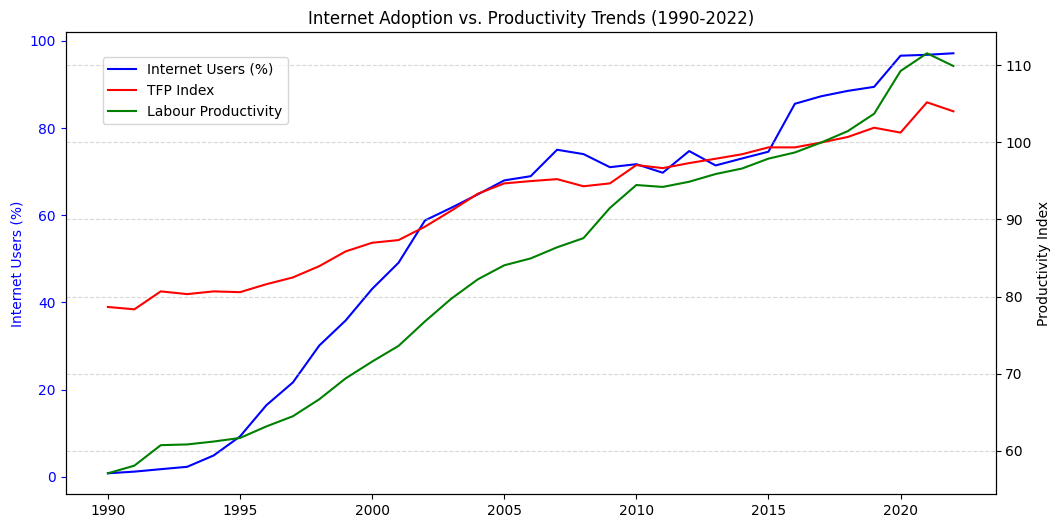

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(merged_df['Year'],merged_df['Internet Users (%)'], color='blue', label='Internet Users (%)')
ax1.set_ylabel('Internet Users (%)', color='blue')
ax1.tick_params(axis='y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(merged_df['Year'],merged_df['TFP_Index'], color='red', label='TFP Index')
ax2.plot(merged_df['Year'],merged_df['Labour_Productivity_Index'], color='green', label='Labour Productivity')
ax2.set_ylabel('Productivity Index', color='black')

plt.title("Internet Adoption vs. Productivity Trends (1990-2022)")
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

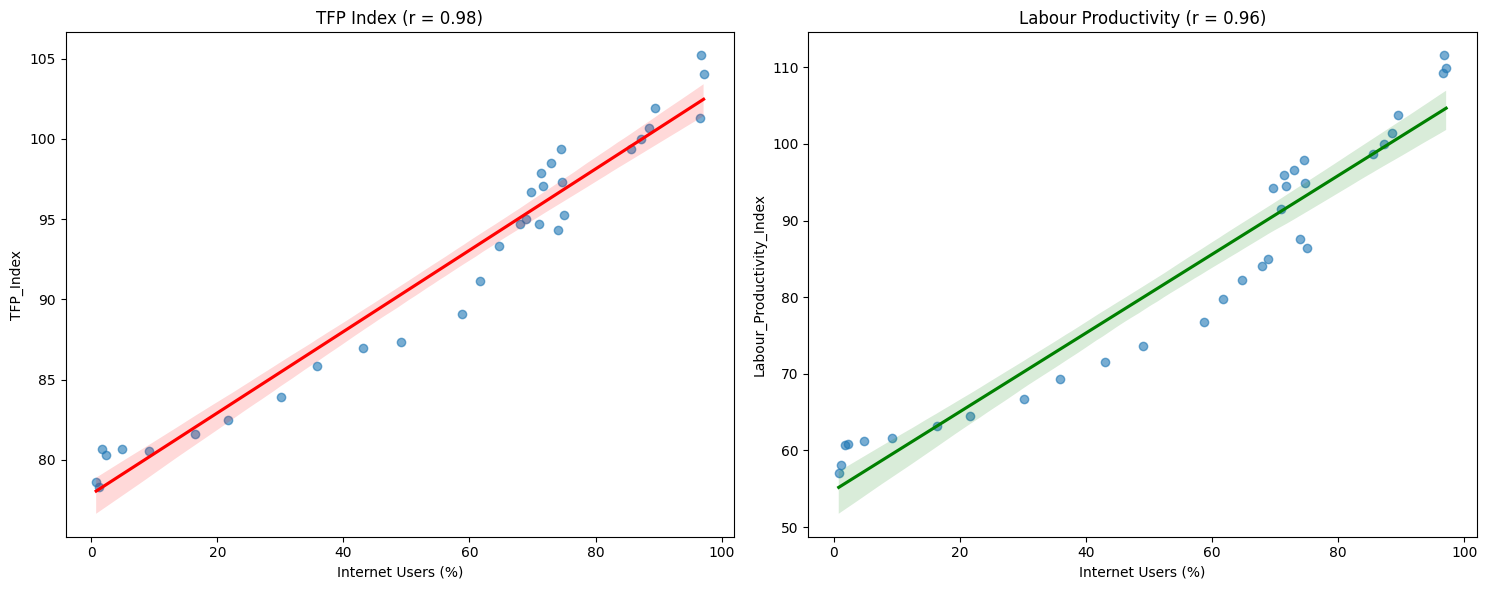

In [ ]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

merged_df['Internet Users (%)'] = pd.to_numeric(merged_df['Internet Users (%)'], errors='coerce')
merged_df['TFP_Index'] = pd.to_numeric(merged_df['TFP_Index'], errors='coerce')
merged_df['Labour_Productivity_Index'] = pd.to_numeric(merged_df['Labour_Productivity_Index'], errors='coerce')

# TFP vs Internet
sns.regplot(x='Internet Users (%)', y='TFP_Index', data=merged_df, ax=ax1,
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
ax1.set_title(f"TFP Index (r = {merged_df[['Internet Users (%)','TFP_Index']].corr().iloc[0,1]:.2f})")

# Labour Productivity vs Internet
sns.regplot(x='Internet Users (%)', y='Labour_Productivity_Index', data=merged_df, ax=ax2,
            scatter_kws={'alpha':0.6}, line_kws={'color':'green'})
ax2.set_title(f"Labour Productivity (r = {merged_df[['Internet Users (%)','Labour_Productivity_Index']].corr().iloc[0,1]:.2f})")

plt.tight_layout()
plt.show()

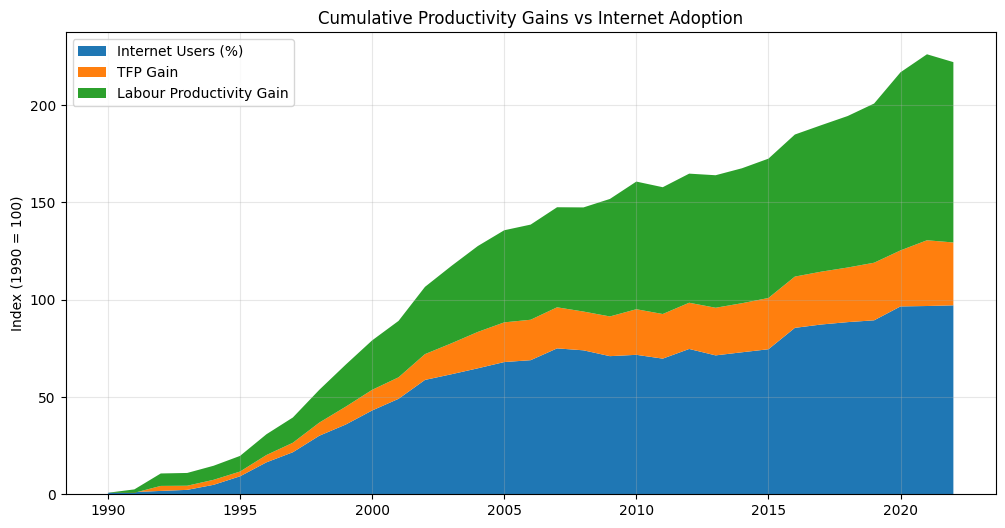

In [ ]:
# Normalize to 1990=100
norm_df = merged_df.copy()
for col in ['TFP_Index', 'Labour_Productivity_Index']:
    norm_df[col] = norm_df[col] / norm_df[col].iloc[0] * 100

plt.figure(figsize=(12,6))
plt.stackplot(norm_df['Year'],
              norm_df['Internet Users (%)'],
              norm_df['TFP_Index']-100,
              norm_df['Labour_Productivity_Index']-100,
              labels=['Internet Users (%)', 'TFP Gain', 'Labour Productivity Gain'])
plt.title("Cumulative Productivity Gains vs Internet Adoption")
plt.ylabel("Index (1990 = 100)")
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()